# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cleansed Dataset

In [2]:
data = pd.read_csv('CustomerChurn-Cleansed Dataset.csv')

In [3]:
dc = data.copy()
dc.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dc.shape #7043 rows and 19 columns

(7043, 19)

# 2. Feature Engineering

## 2.1. Feature Selection

### 2.1.1. Numerical variables

In [5]:
# isolate numerical variables

num = dc[['Tenure', 'Monthly Charges', 'Total Charges']]

#### 2.1.1.1. Checking multicollinearity

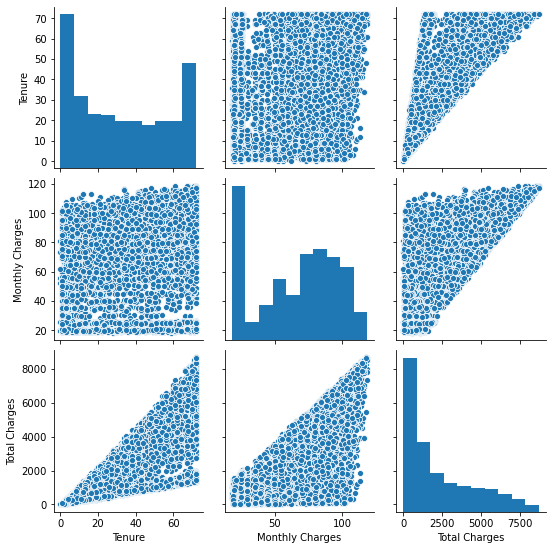

In [6]:
sns.pairplot(num)

# pairplots indicate that Total Charges is correlated with both Tenure and Monthly Charges
# this makes sense because total charges is supposedly a function of tenure and monthly charges

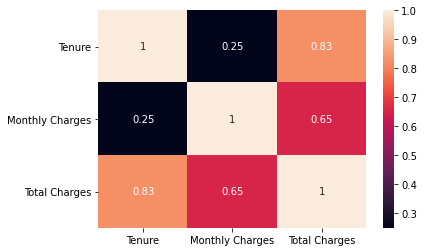

In [7]:
sns.heatmap(num.corr(), annot = True)

# As expected, total charges is strongly correlated with the other two

In [8]:
# Another way to examine multicollinearity is with Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(num.values, i)
                          for i in range(len(num.columns))]
  
print(vif_data)

# As we can see below, 'Tenure' and 'Total Charges' have high value of Variance Inflation Factor (VIF), i.e greater than 5.
# However, we should note that Total Charges is a function of both Tenure and Monthly Charges
# Explaining the high VIF value of Total Charges
# Therefore,we will try eliminating Total Charges and see the resulting VIFs

           feature       VIF
0           Tenure  6.332328
1  Monthly Charges  3.355660
2    Total Charges  8.075070


In [9]:
X = num[['Tenure', 'Monthly Charges']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

           feature       VIF
0           Tenure  2.612607
1  Monthly Charges  2.612607


#### 2.1.1.2. Hypothesis testing

In [10]:
# After eliminating Total Charges
# We want to check whether there is any association between customer's churn and the numerical variables
# because customer's churn has binary values, we are going to use T-Test

In [11]:
dttest = dc[['Tenure', 'Monthly Charges', 'Churn']]


In [12]:
churn_tenure = dttest.pivot(index = dttest.index, columns = 'Churn')['Tenure']
churn_monthly = dttest.pivot(index = dttest.index, columns = 'Churn')['Monthly Charges']

In [13]:
tes = np.log(churn_tenure + 1)

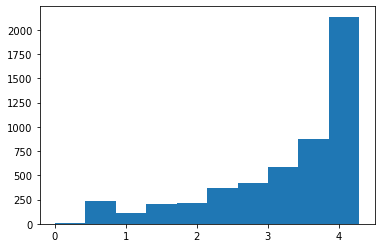

In [14]:
plt.hist(tes['No'].dropna(), bins = 10)
plt.show()

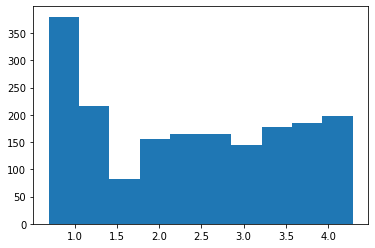

In [15]:
plt.hist(tes['Yes'].dropna(), bins = 10)
plt.show()

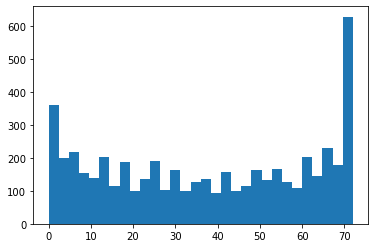

In [16]:
num_bins = 30

plt.hist(churn_tenure['No'], bins = num_bins)
plt.show()

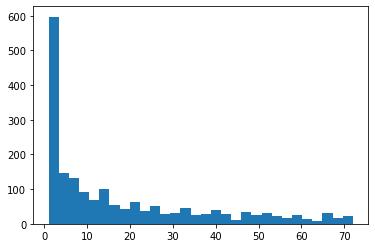

In [17]:
plt.hist(churn_tenure['Yes'], bins = num_bins)
plt.show()

In [18]:
stats.ttest_ind(churn_tenure['No'].dropna(),churn_tenure['Yes'].dropna())

# statistically significant

Ttest_indResult(statistic=31.57955051135377, pvalue=7.99905796059022e-205)

In [19]:
stats.ttest_ind(churn_monthly['No'].dropna(),churn_monthly['Yes'].dropna())

# statistically significant
# we can use both variables!

Ttest_indResult(statistic=-16.53673801593631, pvalue=2.706645606888261e-60)

In [20]:
num = num[['Tenure', 'Monthly Charges']]

### 2.1.2. Categorical variables

In [21]:
# isolate categorical variables

In [22]:
cat = dc.drop(labels = ['Tenure', 'Monthly Charges', 'Total Charges'], axis = 1)
cat

,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn
0,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [23]:
binary = cat[['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']]
bin_dummies = pd.get_dummies(binary, drop_first = True)
bin_dummies

,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Paperless Billing_Yes
0,0,1,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,0,0,0
4,0,0,0,1,1
...,...,...,...,...,...
7038,0,1,1,1,1
7039,0,1,1,1,1
7040,0,1,1,0,1
7041,1,1,0,1,1


In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [25]:
X = bin_dummies.iloc[:, :]
y = bin_dummies.iloc[:, :]

In [26]:
bestfeatures = SelectKBest(score_func = chi2, k = 3)
fit = bestfeatures.fit(X, y)
scr = pd.DataFrame(fit.scores_)
col = pd.DataFrame(X.columns)
featscores = pd.concat([col, scr], axis = 1)
featscores.columns = ['Attributes', 'Score']

In [27]:
featscores.nlargest(5, 'Score')

# we choose Senior Citizen, Dependents, Partner, Paperless Billing

,Attributes,Score
0,Senior Citizen_Yes,5188.334433
2,Dependents_Yes,4186.996325
1,Partner_Yes,2406.121239
4,Paperless Billing_Yes,1255.462509
3,Phone Service_Yes,66.270407


In [28]:
binary = binary[['Senior Citizen', 'Partner', 'Dependents', 'Paperless Billing']]

In [29]:
# isolate multilabels variables

mult = cat.drop(labels = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing', 'Churn'], axis = 1)
mult

,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Payment Method
0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check
1,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check
2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check
3,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic)
4,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...,...,...,...,...
7038,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check
7039,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic)
7040,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check
7041,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check


In [30]:
# we choose Senior Citizen, Dependents, and Partner

mult_dum = pd.get_dummies(mult, drop_first = True)
mult_dum

,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,1,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
7040,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
X = mult_dum.iloc[:, :]
y = mult_dum.iloc[:, :]

In [32]:
bestfeatures = SelectKBest(score_func = chi2, k = 10)
fit = bestfeatures.fit(X, y)
scr = pd.DataFrame(fit.scores_)
col = pd.DataFrame(X.columns)
featscores = pd.concat([col, scr], axis = 1)
featscores.columns = ['Attributes', 'Score']

In [33]:
featscores.nlargest(21, 'Score')

# Tech support, device protection, streaming movies, internet service, online security, streaming TV, ONline backup

,Attributes,Score
10,Tech Support_No internet service,35264.031225
8,Device Protection_No internet service,35264.031225
14,Streaming Movies_No internet service,35264.031225
3,Internet Service_No,35264.031225
4,Online Security_No internet service,35264.031225
12,Streaming TV_No internet service,35264.031225
6,Online Backup_No internet service,35264.031225
20,Payment Method_Mailed check,9302.329826
15,Streaming Movies_Yes,9280.081774
13,Streaming TV_Yes,9256.552713


In [34]:
mult = mult[['Tech Support', 'Device Protection', 'Streaming Movies', 'Internet Service', 'Online Security', 'Online Backup']]

In [35]:
features = pd.concat([num, binary, mult, dc['Churn']], axis = 1)
features

# concatenate selected features and target

,Tenure,Monthly Charges,Senior Citizen,Partner,Dependents,Paperless Billing,Tech Support,Device Protection,Streaming Movies,Internet Service,Online Security,Online Backup,Churn
0,1,29.85,No,Yes,No,Yes,No,No,No,DSL,No,Yes,No
1,34,56.95,No,No,No,No,No,Yes,No,DSL,Yes,No,No
2,2,53.85,No,No,No,Yes,No,No,No,DSL,Yes,Yes,Yes
3,45,42.30,No,No,No,No,Yes,Yes,No,DSL,Yes,No,No
4,2,70.70,No,No,No,Yes,No,No,No,Fiber optic,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,No,Yes,Yes,Yes,Yes,Yes,Yes,DSL,Yes,No,No
7039,72,103.20,No,Yes,Yes,Yes,No,Yes,Yes,Fiber optic,No,Yes,No
7040,11,29.60,No,Yes,Yes,Yes,No,No,No,DSL,Yes,No,No
7041,4,74.40,Yes,Yes,No,Yes,No,No,No,Fiber optic,No,No,Yes


In [36]:
features.to_csv('CustomerChurn-Features.csv', index = False)